In [1]:
import photosom as ps
import numpy as np
import matplotlib.pyplot as plt

# Load data from .dat file
train_raw = np.loadtxt('datasets/train_data.dat') #training region
test_raw = np.loadtxt('datasets/cv_data.dat') #sample region

# u g r i z y
train = np.column_stack((train_raw[:,1], train_raw[:,4], train_raw[:,6], train_raw[:,8],
                         train_raw[:,10], train_raw[:,12], train_raw[:,14]))
test = np.column_stack((test_raw[:,1], test_raw[:,4], test_raw[:,6], test_raw[:,8],
                        test_raw[:,10], test_raw[:,12], test_raw[:,14]))

In [2]:
pz = ps.PhotoSOM(train, test, random_seed=338042)

48430 training and 9440 testing galaxies initialized


In [3]:
z_cutoff_range = [0, 3.1]      # [0, 3.1]    for complete data
mag_cutoff_range = [14, 25.5]  # [14, 25.5]  for complete data
percentile_cut = 0.0           # 0.0         for complete data
n_bins = 100

pz.assignRange(z_cutoff_range, mag_cutoff_range)
pz.selectionFunction(30, percentile_cut)

There are 48430 training galaxies selected


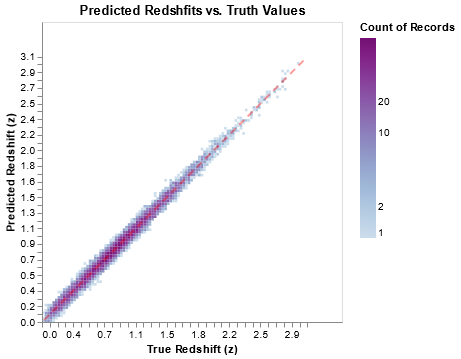

In [4]:
gaussian_pdfs = pz.idealGaussian(0.05, 0.05)
pz.predictionPlot(title="Predicted Redshfits vs. Truth Values")

There are 48430 training galaxies selected
No bins missing


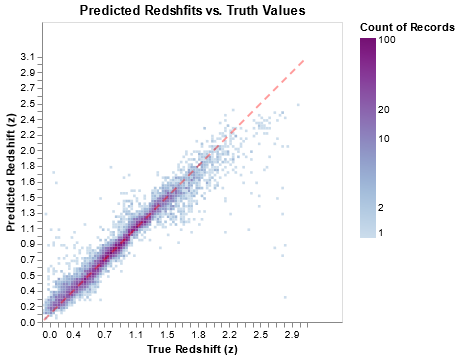

In [5]:
ml_pdfs = pz.randomForestTraining()
pz.predictionPlot(title="Predicted Redshfits vs. Truth Values")

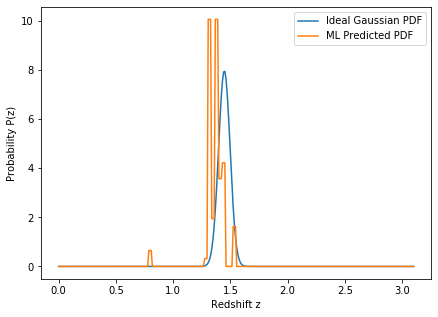

In [6]:
n = np.random.randint(len(pz.pdfs))
x = np.linspace(0, 3.1, 300)

f = plt.figure(figsize=(7,5))
plt.plot(x, gaussian_pdfs[n].pdf(x))
plt.plot(x, ml_pdfs[n].pdf(x))
plt.legend(['Ideal Gaussian PDF', 'ML Predicted PDF'])
plt.xlabel('Redshift z')
plt.ylabel('Probability P(z)')
plt.show()

In [7]:
pz.initSOM(20)

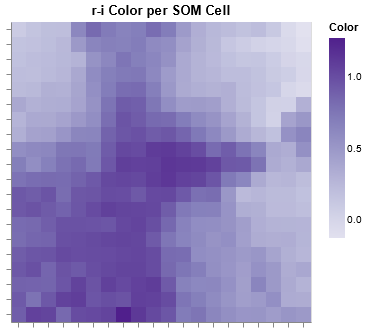

In [8]:
pz.colorMap(title="r-i Color per SOM Cell")

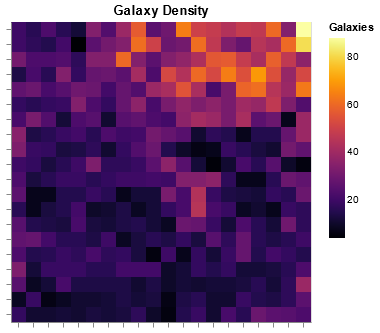

In [9]:
pz.densityMap(title="Galaxy Density")

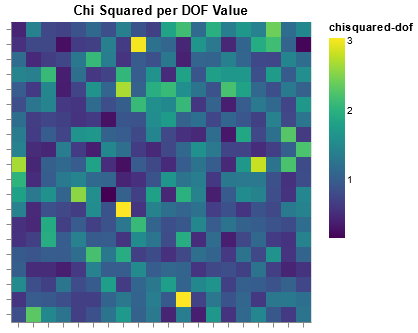

In [10]:
pz.chiSquaredMap(title="Chi Squared per DOF Value")

Failure Rate: 8.25%


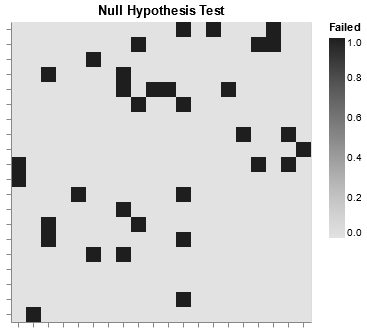

In [11]:
pz.chiSquaredTest(title="Null Hypothesis Test")

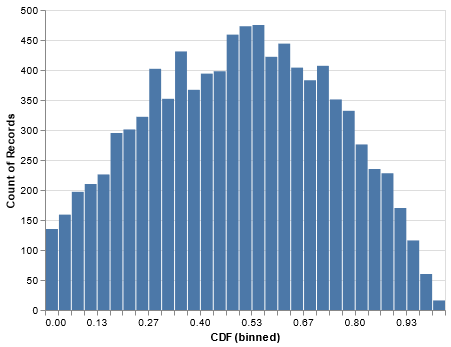

In [12]:
pz.cdfHistogram()